In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [2]:
print(timeseries.head())

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0


In [3]:
print(y.head())

1    True
2    True
3    True
4    True
5    True
dtype: bool


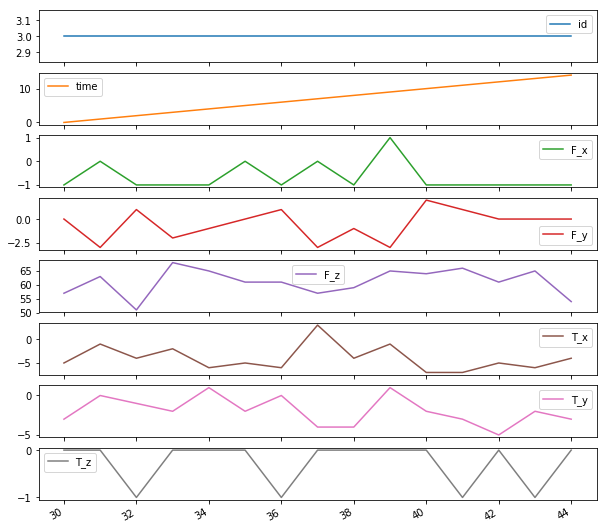

In [5]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

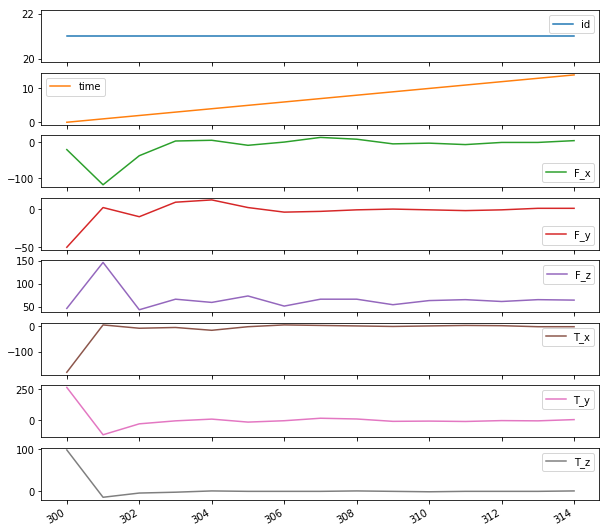

In [6]:
timeseries[timeseries['id'] == 21].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

## For extracting all features with tsfresh

In [7]:
from tsfresh import extract_features
# DataFrame extracted_features with more than 1200 different extracted features 
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 76/76 [00:03<00:00, 23.66it/s]


In [8]:
# We will now remove all NaN values that were created but cannot be used on the given data 

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)

# We select only relevant features 
features_filtered = select_features(extracted_features, y)

/home/mpgill/anaconda3/envs/BeatPD/lib/python3.5/site-packages/tsfresh/utilities/dataframe_functions.py:170: RuntimeWarning: The columns ['F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


In [ ]:
# Extract, impute and filter at the same time 
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

In [78]:
%load_ext autoreload
%autoreload 2
from pca_knn_bpd2 import *

sFileTrai="/export/c08/lmorove1/kaldi/egs/beatPDivec/v1_autoenc/exp/ivec_100/ivectors_Training_Fold0/ivector.scp"
sFileTest="/export/c08/lmorove1/kaldi/egs/beatPDivec/v1_autoenc/exp/ivec_100/ivectors_Testing_Fold0/ivector.scp"
iComponents=50

vTraiPCA, vLTrai, vTraiSubjectId, vTestPCA, vLTest, vTestSubjectId, vTestMeasurementId = pca(sFileTrai, sFileTest, iComponents)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[1004 1004 1004 ... 1051 1051 1051]
['1004' '1004' '1004' ... '1051' '1051' '1051']


In [81]:
print(len(vTraiSubjectId))
print(type(vTestMeasurementId))

sOut="/home/mpgill/BeatPD/BeatPD-CLSP-JHU/"
iNeighbors=3
pca_knn_bpd2(sFileTrai, sFileTest, sOut, iComponents, iNeighbors, sKernel=None, fCValue=None, fEpsilon=None)

1386
<class 'numpy.ndarray'>
[1004 1004 1004 ... 1051 1051 1051]
[1004 1004 1004 ... 1051 1051 1051]
----- 1004----- 
Using KNN
Training accuracy:  0.6349206349206349
Testing accuracy:  0.10526315789473684
Training MSE :  1.0793650793650793
Testing MSE :  3.6842105263157894
----- 1006----- 
Using KNN
Training accuracy:  0.7857142857142857
Testing accuracy:  0.6666666666666666
Training MSE :  0.21428571428571427
Testing MSE :  0.6666666666666666
----- 1007----- 
Using KNN
Training accuracy:  0.6894977168949772
Testing accuracy:  0.45614035087719296
Training MSE :  1.6118721461187215
Testing MSE :  1.7894736842105263
----- 1019----- 
Using KNN
Training accuracy:  0.6571428571428571
Testing accuracy:  0.5
Training MSE :  2.742857142857143
Testing MSE :  4.2
----- 1020----- 
Using KNN
Training accuracy:  0.8571428571428571
Testing accuracy:  0.7804878048780488
Training MSE :  0.6103896103896104
Testing MSE :  1.170731707317073
----- 1023----- 
Using KNN
Training accuracy:  0.63414634146341

In [77]:
salut = ['100001_test_5163afe8-a6b0-4ea4-b2ba-9b4501dd5912_10040',
 '100002_test_9152519b-4b57-43be-963c-dd7218495001_10040',
 '100003_test_c7312d73-cb34-4025-b8b8-5299b4033e2f_10040',
 '100004_test_cc730391-146b-420f-9255-c3185061f178_10040',
 '100005_test_cc7b822c-e310-46f0-a8ea-98c95fdb67a1_10041',
 '100006_test_5cf68c8e-0b7a-4b73-ad4f-015c7a20fb5a_10041',
 '100007_test_19a3e9ea-fce1-40b7-9457-2618970beb7b_10041',
 '100008_test_e2973da8-1250-4a7c-98d5-b165570a8aeb_10041',
 '100009_test_dc90dc36-b4e5-43ec-b3e8-47c39c763c71_10041']

salut2= ['100001_test_5163afe8-a6b0-4ea4-b2ba-9b4501dd5912_hbv0401',
 '100002_test_9152519b-4b57-43be-963c-dd7218495001_hbv0401',
 '100003_test_c7312d73-cb34-4025-b8b8-5299b4033e2f_hbv0401',
 '100004_test_cc730391-146b-420f-9255-c3185061f178_hbv0401',
 '100005_test_cc7b822c-e310-46f0-a8ea-98c95fdb67a1_hbv0411',
 '100006_test_5cf68c8e-0b7a-4b73-ad4f-015c7a20fb5a_hbv0411',
 '100007_test_19a3e9ea-fce1-40b7-9457-2618970beb7b_hbv0411',
 '100008_test_e2973da8-1250-4a7c-98d5-b165570a8aeb_hbv0412',
 '100009_test_dc90dc36-b4e5-43ec-b3e8-47c39c763c71_hbv0412']


sPattern=r'(?<=[_])(1[0-9]{3}(?<=\d)(?!=$)|hbv[0-9]{3})'

vTraiSubjectId = [re.findall(sPattern, fileName)[0] for fileName in salut]

# vTraiSubjectId = np.array(([x[-5:-1] for x in np.array(salut)]))
print(vTraiSubjectId)

vTraiSubjectId2 = [re.findall(sPattern, fileName)[0] for fileName in salut2]
print(vTraiSubjectId2)

['1004', '1004', '1004', '1004', '1004', '1004', '1004', '1004', '1004']
['hbv040', 'hbv040', 'hbv040', 'hbv040', 'hbv041', 'hbv041', 'hbv041', 'hbv041', 'hbv041']
